#  Model sentiment analysis menggunakan 4 model (RF, SVM, Naive Bayes, dan Logistic Regression)

In [37]:
# Import Library
import numpy as np 
import pandas as pd 
import seaborn as sns 

In [38]:
# Input data set
url = "https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_tweet_sentiment_cellular_service_provider.csv"
df = pd.read_csv(url)
df.head() 

,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>


In [39]:
df.rename(columns={'Text Tweet':'text_tweet'},inplace=True)
df.head()

,Id,Sentiment,text_tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>


In [40]:
from sklearn.preprocessing import LabelEncoder 

X = df.iloc[:,2].values 
Le = LabelEncoder()
Le.fit(['positive','negative']) 

y = Le.transform(df.iloc[:,1].values)

print(list(Le.classes_))

['negative', 'positive']


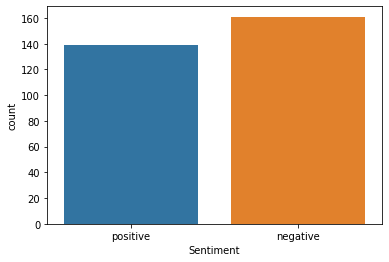

In [41]:
# Explorasi data 
sns.countplot(x='Sentiment', data = df)

In [42]:
df['Sentiment'].value_counts()

negative    161
positive    139
Name: Sentiment, dtype: int64

In [43]:
import requests
import re

In [44]:
# Preprocessing menghilangkan stopword menggunakan Stopwordlist Indonesia 
url = "https://raw.githubusercontent.com/Wayan123/Sentiment-Analysis/main/stopwordlist.txt" 
ina_stopword = requests.get(url).content 

stop_list = [] 
for tempstp in ina_stopword.split():
  stop_list.append(tempstp)

In [45]:
# Menghapus special character dan stopword 
clean_text = "@#=-_\S+|https?:\S+http?:\S|{^A-Za-z}+" 

def preproses(text_tweet):
  text_tweet = re.sub(clean_text,'',str(text_tweet).lower()).strip()
  tokens = []
  for token in text_tweet.split():
    if token not in stop_list:
      tokens.append(token) 
  return ''.join(tokens)

In [46]:
df['clean_twt'] = df.text_tweet.apply(lambda x: preproses(x))

In [47]:
df.head()

,Id,Sentiment,text_tweet,clean_twt
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,<user_mention>#boikot_<provider_name>gunakanpr...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...","saktinyabaliklagi,alhamdulillah:v<provider_name>"
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,selamatpagi<provider_name>bisabantukenapadidal...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,dear<provider_name>akhir2inijaringandatalemotb...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,selamatmalampendusta<provider_name>


In [59]:
#melakukan pemodelan prediksi
%%time
import time 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, log_loss, accuracy_score, recall_score, precision_score

CPU times: user 36 µs, sys: 6 µs, total: 42 µs
Wall time: 45.3 µs


In [60]:
#membangun vector space model/pembobotan dengan tfidf
vectorizer = TfidfVectorizer(ngram_range=(1,3),min_df=5)
features = vectorizer.fit_transform(df.clean_twt).toarray()

In [61]:
vectorizer.vocabulary_

{'4g': 0,
 'boikot': 1,
 'boikot provider_name': 2,
 'jaringan': 3,
 'jaringan provider_name': 4,
 'lte': 5,
 'poin': 6,
 'product_name': 7,
 'product_name provider_name': 8,
 'provider_name': 9,
 'provider_name poin': 10,
 'provider_name product_name': 11,
 'provider_name provider_name': 12,
 'provider_name url': 13,
 'rt': 14,
 'rt user_mention': 15,
 'sinyal': 16,
 'sinyal provider_name': 17,
 'terimakasih': 18,
 'terimakasih provider_name': 19,
 'url': 20,
 'user_mention': 21}

In [62]:
#melakukan split data training untuk mengetahui akurasi
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

In [63]:
#modeling sentiment
LR_ = LogisticRegression().fit(X_train, y_train)

In [64]:
#melakukan evaluasi
yhat = LR_.predict(X_test)
yhat_prob = LR_.predict_proba(X_test)
# print('F1 score : ', f1_score(y_test, yhat, average='weighted'))
print('Accuracy  = ', round(accuracy_score(y_test,yhat)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, yhat)*100,2),'%')
print('Precision = ', round(precision_score(y_test, yhat)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, yhat)*100,2),'%')

print('Log Loss : ', round(log_loss(y_test, yhat_prob), 2))

Accuracy  =  48.33 %
Recall    =  22.22 %
Precision =  37.5 %
F1-Score  =  27.91 %
Log Loss :  0.71


Pelatihan dan Evaluasi dari Model Klasifikasi Teks

In [65]:
import time

from sklearn.ensemble import RandomForestClassifier

text_classifier_en = RandomForestClassifier(n_estimators=100, random_state=0)
t0_en = time.time()
text_classifier_en.fit(X_train, y_train)
t1_en = time.time()

In [66]:
from sklearn.naive_bayes import GaussianNB
text_classifier_nb = GaussianNB()  
t0_nb = time.time()
text_classifier_nb.fit(X_train, y_train)
t1_nb = time.time()

In [67]:
from sklearn.svm import SVC
text_classifier_svm = SVC(kernel='linear')
t0_svm = time.time()
text_classifier_svm.fit(X_train, y_train)
t1_svm = time.time()

In [75]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
t0_LR = time.time()
LR.fit(X_train, y_train)
t1_LR = time.time()

In [79]:
predictions_en = text_classifier_en.predict(X_test)
t2_en = time.time()
time_linear_train_en = t1_en-t0_en
time_linear_predict_en = t2_en-t1_en

predictions_nb = text_classifier_nb.predict(X_test)
t2_nb = time.time()
time_linear_train_nb = t1_nb-t0_nb
time_linear_predict_nb = t2_nb-t1_nb

predictions_svm = text_classifier_svm.predict(X_test)
t2_svm = time.time()
time_linear_train_svm = t1_svm-t0_svm
time_linear_predict_svm = t2_svm-t1_svm

predictions_LR = LR.predict(X_test)
t2_LR = time.time()
time_linear_train_LR = t1_LR-t0_LR
time_linear_predict_LR = t2_LR-t1_LR

# results
print("EN Training time: %fs; Prediction time: %fs" % (time_linear_train_en, time_linear_predict_en))
print("NB Training time: %fs; Prediction time: %fs" % (time_linear_train_nb, time_linear_predict_nb))
print("SVM Training time: %fs; Prediction time: %fs" % (time_linear_train_svm, time_linear_predict_svm))
print("LR Training time: %fs; Prediction time: %fs" % (time_linear_train_LR, time_linear_predict_LR)) 

EN Training time: 0.137263s; Prediction time: 886.869864s
NB Training time: 0.002000s; Prediction time: 866.122485s
SVM Training time: 0.004195s; Prediction time: 854.624454s
LR Training time: 0.004175s; Prediction time: 218.467658s


Results

In [80]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

print("Random Forest")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_en)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_en)*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_en)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_en)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, predictions_en))
print("")
print("Naive Bayes")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_nb)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_nb)*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_nb)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_nb)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, predictions_nb))
print("")
print("Support Vector Machine")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_svm)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_svm)*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_svm)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_svm)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, predictions_svm))
print("")
print("Logistic Regression") 
print('Accuracy  = ', round(accuracy_score(y_test, predictions_LR)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_LR)*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_LR)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_LR)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, predictions_LR))
print("") 

Random Forest
Accuracy  =  50.0 %
Recall    =  22.22 %
Precision =  40.0 %
F1-Score  =  28.57 %
ROC AUC   =  0.47474747474747475

Naive Bayes
Accuracy  =  50.0 %
Recall    =  25.93 %
Precision =  41.18 %
F1-Score  =  31.82 %
ROC AUC   =  0.47811447811447816

Support Vector Machine
Accuracy  =  48.33 %
Recall    =  29.63 %
Precision =  40.0 %
F1-Score  =  34.04 %
ROC AUC   =  0.4663299663299663

Logistic Regression
Accuracy  =  48.33 %
Recall    =  22.22 %
Precision =  37.5 %
F1-Score  =  27.91 %
ROC AUC   =  0.45959595959595967

